# Predicting Climate Change and Impacts in Africa - A DataCamp Case Study Project

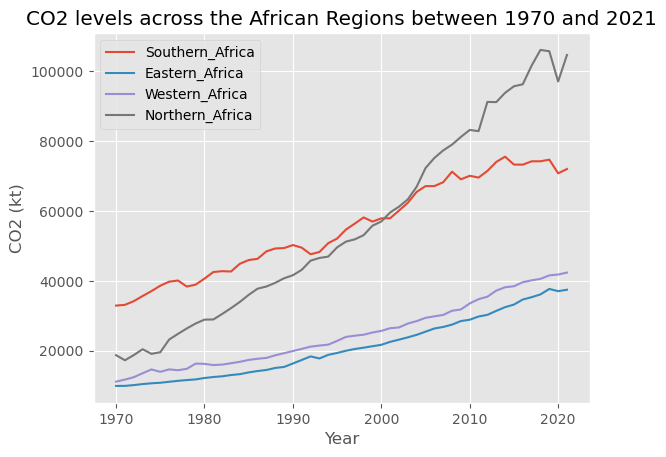

## Preamble

This article is on the case study I did through the [I4G](https:ingressive.org) scholarship I won last year (2023) on the [DataCamp](https://datacamp.com) platform. 

Special thanks to [I4G](https:ingressive.org) and [DataCamp](https://datacamp.com) for the opportunity afforded to me and thousands of other learners across the globe through this scholarship. In case you will also want to be an I4G scholars, just visit both [I4G](https:ingressive.org) and [DataCamp](https://datacamp.com) websites and familiarise yourself with the process. DataCamp always post scholarships and other learning opportunities through their partners all through the calendar year. So, be on the lookout. Never stop learning!

Now let's dig into this exiciting Case Study Project.

## Project Overview

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

The scenario is this: I work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided me with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which I will clean, combine and analyze to create a report on the state of climate change in Africa. I will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.

In [1]:
# Setup
import pandas as pd
import numpy as np
import pingouin as pg
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect

plt.style.use('ggplot')

# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# We need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')

## Instruction 1: Clean and tidy the datasets

### Tasks

- Define a function that will clean and tidy up the datasets at once
- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.

In [2]:
# Load the datasets with the sheet name argumment correctly stated
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = 'IPCC 2006', skiprows = 10)
# Convert the dictionary object to a dataframe
datasets = pd.DataFrame(datasets)
# Assign to df1
df1 = datasets
# View the datasets
df1.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CO2,bio,0.022397,0.021412,...,1.337603,2.371433,2.497066,2.970795,2.438748,2.509098,3.096665,3.255611,3.378899,3.378899
1,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,CO2,bio,12.228673,11.690942,...,9.856529,6.886571,6.890052,7.378661,7.853166,9.340506,7.365402,7.718069,8.047569,8.047569
2,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,CO2,bio,0.879948,0.845336,...,6.473158,6.021210,6.630579,5.848465,6.489807,6.417006,6.410401,4.571319,7.808080,7.808080
3,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,CO2,bio,0.058367,0.056820,...,1.714841,1.721481,1.838701,2.157164,1.972983,2.068339,2.147736,2.004358,2.450398,2.450398
4,Non-Annex_I,Rest Central America,ABW,Aruba,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# View the columns
df1.columns

Index(['IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'Name',
       'ipcc_code_2006_for_standard_report',
       'ipcc_code_2006_for_standard_report_name', 'Substance', 'fossil_bio',
       'Y_1970', 'Y_1971', 'Y_1972', 'Y_1973', 'Y_1974', 'Y_1975', 'Y_1976',
       'Y_1977', 'Y_1978', 'Y_1979', 'Y_1980', 'Y_1981', 'Y_1982', 'Y_1983',
       'Y_1984', 'Y_1985', 'Y_1986', 'Y_1987', 'Y_1988', 'Y_1989', 'Y_1990',
       'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994', 'Y_1995', 'Y_1996', 'Y_1997',
       'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002', 'Y_2003', 'Y_2004',
       'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009', 'Y_2010', 'Y_2011',
       'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016', 'Y_2017', 'Y_2018',
       'Y_2019', 'Y_2020', 'Y_2021'],
      dtype='object')

In [4]:
# # Check ipcc_2006_africa dataset
ipcc_2006_africa

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
42,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,468.101210,468.101210,...,878.017490,876.424760,694.984348,628.393538,716.208742,745.933600,790.238440,796.965524,806.888450,835.471254
43,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,9803.605447,9803.605447,...,18457.831374,18758.674388,19052.717572,19338.111419,19616.705006,19909.315374,20177.076755,20441.554365,20904.334177,20904.334177
44,Non-Annex_I,Southern_Africa,AGO,Angola,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1168.997514,1149.912236,...,2224.584701,3824.749751,3521.645794,3651.157894,4482.919263,4500.168653,4686.371296,4779.221426,4386.060462,4085.260834
46,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,137.584287,137.584287,...,2699.129471,3993.658132,5669.710708,6130.962446,4198.262959,4071.508850,4016.468964,4612.129507,4304.458056,4687.903324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.A.4,Other Process Uses of Carbonates,CO2,fossil,NaN,NaN,...,1.753279,2.182478,1.474799,1.951282,1.528562,1.739092,1.509467,1.374865,1.389039,1.417387
4769,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.B,Chemical Industry,CO2,fossil,92.565000,155.040000,...,63.750000,68.850000,56.100000,58.800000,10.500000,31.500000,33.600000,10.500000,10.500000,NaN
4770,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.C,Metal Industry,CO2,fossil,1357.949642,1202.712467,...,178.100000,195.078000,278.343000,150.261800,185.640000,185.640000,234.000000,228.743089,222.373569,310.070187
4771,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.D,Non-Energy Products from Fuels and Solvent Use,CO2,fossil,22.738632,23.553464,...,57.840742,57.879892,58.915828,57.958218,58.034373,58.111482,58.189518,59.330242,54.166537,57.980658


In [5]:
# Assign 'ipcc_2006_africa' to new variable 'df2'
df2 = ipcc_2006_africa
df2.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
42,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,468.101210,468.101210,...,878.017490,876.424760,694.984348,628.393538,716.208742,745.933600,790.238440,796.965524,806.888450,835.471254
43,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,9803.605447,9803.605447,...,18457.831374,18758.674388,19052.717572,19338.111419,19616.705006,19909.315374,20177.076755,20441.554365,20904.334177,20904.334177
44,Non-Annex_I,Southern_Africa,AGO,Angola,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1168.997514,1149.912236,...,2224.584701,3824.749751,3521.645794,3651.157894,4482.919263,4500.168653,4686.371296,4779.221426,4386.060462,4085.260834
46,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,137.584287,137.584287,...,2699.129471,3993.658132,5669.710708,6130.962446,4198.262959,4071.508850,4016.468964,4612.129507,4304.458056,4687.903324


In [6]:
# Check df2 columns
df2.columns

Index(['IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'Name',
       'ipcc_code_2006_for_standard_report',
       'ipcc_code_2006_for_standard_report_name', 'Substance', 'fossil_bio',
       'Y_1970', 'Y_1971', 'Y_1972', 'Y_1973', 'Y_1974', 'Y_1975', 'Y_1976',
       'Y_1977', 'Y_1978', 'Y_1979', 'Y_1980', 'Y_1981', 'Y_1982', 'Y_1983',
       'Y_1984', 'Y_1985', 'Y_1986', 'Y_1987', 'Y_1988', 'Y_1989', 'Y_1990',
       'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994', 'Y_1995', 'Y_1996', 'Y_1997',
       'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002', 'Y_2003', 'Y_2004',
       'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009', 'Y_2010', 'Y_2011',
       'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016', 'Y_2017', 'Y_2018',
       'Y_2019', 'Y_2020', 'Y_2021'],
      dtype='object')

In [7]:
# Check the african regions list
african_regions

['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

In [8]:
# View first 5 rows of 'totals_by_country_africa' dataset
totals_by_country_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,...,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,...,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,...,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,...,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [9]:
# Assign 'totals_by_country_africa' to 'df3' 
df3 = totals_by_country_africa
# Check df3
df3.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,...,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,...,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,...,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,...,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [10]:
# Define a function to perform data cleaing on the datasets
def clean_and_tidy_data(df):
    # Step 1: Rename columns
    rename_dict = {
        'C_group_IM24_sh': 'Region',
        'Country_code_A3': 'Code',
        'ipcc_code_2006_for_standard_report_name': 'Industry'
    }
    df.rename(columns=rename_dict, inplace=True)
    
    # Step 2: Drop unnecessary columns if they exist
    drop_columns = ['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance']
    existing_drop_columns = [col for col in drop_columns if col in df.columns]
    df.drop(columns=existing_drop_columns, inplace=True)
    
    # Step 3: Melt the dataframe from wide to long format
    id_vars = ['Region', 'Code', 'Name']
    optional_vars = ['Industry', 'fossil_bio']
    
    existing_optional_vars = [col for col in optional_vars if col in df.columns]
    id_vars += existing_optional_vars
    
    value_vars = [col for col in df.columns if col.startswith('Y_')]
    
    df = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='CO2')
    
    # Step 4: Drop rows where 'CO2' is missing
    df.dropna(subset=['CO2'], inplace=True)
    
    # Step 5: Remove prefix 'Y_' from 'Year'
    df['Year'] = df['Year'].str.replace('Y_', '')
    
    # Step 6: Convert datatype for 'Year' from string to integer
    df['Year'] = df['Year'].astype(int)
    
    return df

In [11]:
# Apply the function on the dataframes
# Cleaned datasets
df1 = clean_and_tidy_data(df1)
df2 = clean_and_tidy_data(df2)
df3 = clean_and_tidy_data(df3)

In [12]:
# View te cleaned datasets
print(df1.head())

print("......................")

print(df2.head())

print("......................")

print(df3.head())

                 Region Code   Name  \
0  Rest Central America  ABW  Aruba   
1  Rest Central America  ABW  Aruba   
2  Rest Central America  ABW  Aruba   
3  Rest Central America  ABW  Aruba   
5  Rest Central America  ABW  Aruba   

                                        Industry fossil_bio  Year        CO2  
0  Main Activity Electricity and Heat Production        bio  1970   0.022397  
1      Manufacturing Industries and Construction        bio  1970  12.228673  
2                  Residential and other sectors        bio  1970   0.879948  
3                                  Non-Specified        bio  1970   0.058367  
5  Main Activity Electricity and Heat Production     fossil  1970  34.724363  
......................
            Region Code    Name  \
0  Southern_Africa  AGO  Angola   
1  Southern_Africa  AGO  Angola   
3  Southern_Africa  AGO  Angola   
4  Southern_Africa  AGO  Angola   
5  Southern_Africa  AGO  Angola   

                                            Industry foss

* The datasets are now cleaned and ready for analysis

## Instruction 2: Show the trend of `CO2` levels across the African regions

### Tasks

- Using `totals_by_country_africa`, create a line plot of `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year.


C:\Users\user\AppData\Local\Temp\ipykernel_20488\527632337.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='CO2', hue='Region', data=data, ci=None)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


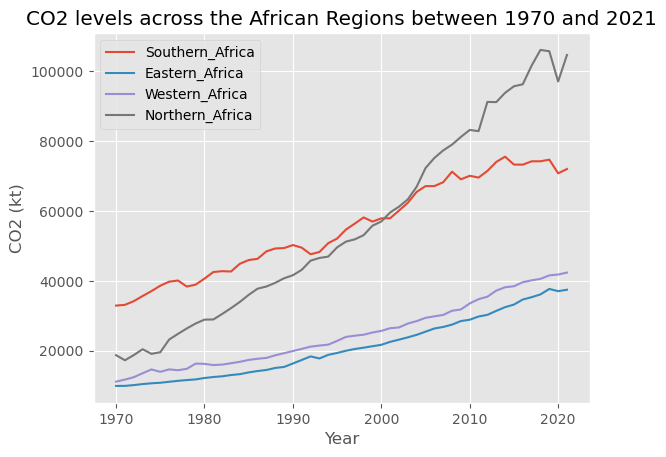

In [13]:
# Show the trends of CO2 levels across the African regions
data = df3
sns.lineplot(x='Year', y='CO2', hue='Region', data=data, ci=None)
plt.legend(loc='upper left')
plt.title('CO2 levels across the African Regions between 1970 and 2021')
plt.ylabel('CO2 (kt)')
plt.show()


**Southern Africa had the highest level of CO2 in 1970 but Northern Africa had the highest CO2 level in 2020. Across all the regions,the CO2 levels increased as the years increase, though the exponential increase over the years is more pronounced in Southern Africa**

## Instruction 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions


### Tasks

- Using the `totals_by_country_africa` dataset, I conducted a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Then I saved the results in a variable called `relationship_btw_time_CO2`.

In [14]:
# Relationship between time ('Year') and 'CO2' across the African regions
grouped = df3.groupby(['Region', 'Year'], as_index=False)['CO2'].count()
print(grouped)

print("-----------------------------")

grouped_ = grouped[['Year', 'CO2']]
print(grouped_)

             Region  Year  CO2
0    Eastern_Africa  1970   14
1    Eastern_Africa  1971   14
2    Eastern_Africa  1972   14
3    Eastern_Africa  1973   14
4    Eastern_Africa  1974   14
..              ...   ...  ...
203  Western_Africa  2017   25
204  Western_Africa  2018   25
205  Western_Africa  2019   25
206  Western_Africa  2020   25
207  Western_Africa  2021   25

[208 rows x 3 columns]
-----------------------------
     Year  CO2
0    1970   14
1    1971   14
2    1972   14
3    1973   14
4    1974   14
..    ...  ...
203  2017   25
204  2018   25
205  2019   25
206  2020   25
207  2021   25

[208 rows x 2 columns]


In [15]:
# Find the correlation between 'Year' and 'CO2' with corr() function
grouped_corr = grouped_.corr()
grouped_corr

,Year,CO2
Year,1.000000e+00,2.570201e-15
CO2,2.570201e-15,1.000000e+00


In [16]:
# Find the correlation with 'spearman'
relationship_btw_time_CO2 = grouped_corr.corr(method='spearman')
relationship_btw_time_CO2

,Year,CO2
Year,1.0,-1.0
CO2,-1.0,1.0


**The relationship between the ```time ('Year')``` and ```'CO2'``` levels across the African regions are not directly proportional.**

## Instruction 4: Determine if there is a significant difference in the CO2 levels among the African Regions

### Tasks

- Using `totals_by_country_africa`, I conducted an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. I saved the results as `aov_results`.
- Then, I conducted a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. I saved the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide us with the answer.

In [17]:
# Conduct an anova test
df_anova = df3
aov_results = pg.anova(dv='CO2', between='Region', data=df_anova)
aov_results

,Source,ddof1,ddof2,F,p-unc,np2
0,Region,3,2908,35.558065,1.455509e-22,0.035385


In [18]:
# Conduct a posthoc test with pingouin (pg)
pw_ttest_result = pg.pairwise_tests(data=df_anova, dv='CO2', between='Region', parametric=True, 
                                    marginal=True, alpha=0.05, alternative='two-sided', 
                                    padjust='bonf', nan_policy='listwise', return_desc=False, 
                                    interaction=True, within_first=True)

# Check the test result
pw_ttest_result 

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Region,Eastern_Africa,Northern_Africa,False,True,-9.435557,388.384101,two-sided,3.637966e-19,2.182780e-18,bonf,1.554e+17,-0.801390
1,Region,Eastern_Africa,Southern_Africa,False,True,-6.814718,641.441785,two-sided,2.180575e-11,1.308345e-10,bonf,4.024e+08,-0.421846
2,Region,Eastern_Africa,Western_Africa,False,True,-1.556846,1917.149304,two-sided,1.196721e-01,7.180324e-01,bonf,0.173,-0.059094
3,Region,Northern_Africa,Southern_Africa,False,True,0.080513,881.040358,two-sided,9.358475e-01,1.000000e+00,bonf,0.079,0.004785
4,Region,Northern_Africa,Western_Africa,False,True,7.588964,567.964972,two-sided,1.328970e-13,7.973818e-13,bonf,9.641e+10,0.418029
5,Region,Southern_Africa,Western_Africa,False,True,5.720995,795.803852,two-sided,1.499036e-08,8.994214e-08,bonf,5.437e+05,0.335300


**Yes, it is true that the CO2 levels of the Southern_Africa and Northern_Africa region do not differ significantly because the p-corr value is 1.**

## Instruction 5: Determine the most common (top 5) industries in each African region.

### Tasks

- I grouped the `ipcc_2006_africa` data by `Region` and `Industry`.
- I counted the occurrences of each `Industry` within each `Region` and name it `Count`.
- I sorted the data within each region group by `Count` in descending order
- Then, I got the top 5 industries for each region
- Finally, I saved it to variable `top_5_industries` for each region.

In [19]:
# Group df2 by 'Region' and 'Industry'
ipcc_grouped = df2.groupby(['Region', 'Industry'], as_index=False)['CO2'].sum()
ipcc_grouped

,Region,Industry,CO2
0,Eastern_Africa,Cement production,1.377217e+05
1,Eastern_Africa,Chemical Industry,5.788500e+01
2,Eastern_Africa,Civil Aviation,3.629712e+04
3,Eastern_Africa,Emissions from biomass burning,6.981747e+05
4,Eastern_Africa,Glass Production,4.918561e+02
...,...,...,...
87,Western_Africa,Residential and other sectors,2.211416e+07
88,Western_Africa,Road Transportation no resuspension,1.983909e+06
89,Western_Africa,Solid Fuels,4.315588e+02
90,Western_Africa,Urea application,1.231862e+04


In [20]:
# Get a df_count with columns 'Region' and 'Industry' from df2
df2_count = df2[['Region', 'Industry']]
df2_count.head()

,Region,Industry
0,Southern_Africa,Manufacturing Industries and Construction
1,Southern_Africa,Residential and other sectors
3,Southern_Africa,Emissions from biomass burning
4,Southern_Africa,Main Activity Electricity and Heat Production
5,Southern_Africa,Petroleum Refining - Manufacture of Solid Fuel...


In [21]:
# Count how many 'Industry' within each 'Region'
Count = df2_count['Region'].value_counts()
Count

Region
Western_Africa     19600
Eastern_Africa     11897
Southern_Africa     9772
Northern_Africa     5472
Name: count, dtype: int64

In [22]:
# Sort data in descending order
df2_sorted = Count.sort_values(ascending=False)
df2_sorted

Region
Western_Africa     19600
Eastern_Africa     11897
Southern_Africa     9772
Northern_Africa     5472
Name: count, dtype: int64

In [23]:
# Filter each region from the main df
df_eastern = df2.loc[df2['Region'] == 'Eastern_Africa']
df_western = df2.loc[df2['Region'] == 'Western_Africa']
df_southern = df2.loc[df2['Region'] == 'Southern_Africa']
df_northern = df2.loc[df2['Region'] == 'Northern_Africa']

In [24]:
# Top 5 industries in Eastern_Africa
df_eastern_count = df_eastern.groupby(['Region', 'Industry'], as_index=False).count()
df_eastern_sort = df_eastern_count.sort_values(by='CO2', ascending=False)
df_eastern_top_5 = df_eastern_sort.head()
df_eastern_top_5

,Region,Industry,Code,Name,fossil_bio,Year,CO2
18,Eastern_Africa,Residential and other sectors,1454,1454,1454,1454,1454
9,Eastern_Africa,Manufacturing Industries and Construction,1383,1383,1383,1383,1383
8,Eastern_Africa,Main Activity Electricity and Heat Production,1174,1174,1174,1174,1174
19,Eastern_Africa,Road Transportation no resuspension,742,742,742,742,742
11,Eastern_Africa,Non-Energy Products from Fuels and Solvent Use,728,728,728,728,728


The top 5 industries in Eastern_Africa are: 

* Residential and other sectors

* Manufacturing industries and Construction

* Main Activity Electricity and Heat Production

* Road Transportation no resuspension, and

* Non-Energy Products from Fuels and Solvents

In [25]:
# Top 5 industries in Western_Africa
df_western_count = df_western.groupby(['Region', 'Industry'], as_index=False).count()
df_western_sort = df_western_count.sort_values(by='CO2', ascending=False)
df_western_top_5 = df_western_sort.head()
df_western_top_5

,Region,Industry,Code,Name,fossil_bio,Year,CO2
18,Western_Africa,Residential and other sectors,2541,2541,2541,2541,2541
9,Western_Africa,Manufacturing Industries and Construction,2265,2265,2265,2265,2265
8,Western_Africa,Main Activity Electricity and Heat Production,1895,1895,1895,1895,1895
4,Western_Africa,Glass Production,1300,1300,1300,1300,1300
19,Western_Africa,Road Transportation no resuspension,1297,1297,1297,1297,1297


The top 5 industries in Western_Africa are: 

* Residential and other sectors

* Manufacturing industries and Construction

* Main Activity Electricity and Heat Production

* Glass Production; and

* Road Transportation no resuspension.

In [26]:
# Top 5 industries in Southern_Africa
df_southern_count = df_southern.groupby(['Region', 'Industry'], as_index=False).count()
df_southern_sort = df_southern_count.sort_values(by='CO2', ascending=False)
df_southern_top_5 = df_southern_sort.head()
df_southern_top_5

,Region,Industry,Code,Name,fossil_bio,Year,CO2
18,Southern_Africa,Residential and other sectors,1144,1144,1144,1144,1144
9,Southern_Africa,Manufacturing Industries and Construction,1067,1067,1067,1067,1067
8,Southern_Africa,Main Activity Electricity and Heat Production,798,798,798,798,798
19,Southern_Africa,Road Transportation no resuspension,580,580,580,580,580
11,Southern_Africa,Non-Energy Products from Fuels and Solvent Use,572,572,572,572,572


The top 5 industries in Southern_Africa are:

* Residential and other sectors

* Manufacturing industries and Construction

* Main Activity Electricity and Heat Production

* Road Transportation no resuspension; and 

* Non-Energy Products from Fuels and Solvents

In [27]:
# Top 5 industries in Northern_Africa
df_northern_count = df_northern.groupby(['Region', 'Industry'], as_index=False).count()
df_northern_sort = df_northern_count.sort_values(by='CO2', ascending=False)
df_northern_top_5 = df_northern_sort.head()
df_northern_top_5

,Region,Industry,Code,Name,fossil_bio,Year,CO2
18,Northern_Africa,Residential and other sectors,572,572,572,572,572
9,Northern_Africa,Manufacturing Industries and Construction,456,456,456,456,456
8,Northern_Africa,Main Activity Electricity and Heat Production,315,315,315,315,315
11,Northern_Africa,Non-Energy Products from Fuels and Solvent Use,312,312,312,312,312
19,Northern_Africa,Road Transportation no resuspension,312,312,312,312,312


The top 5 industries in Northern_Africa are: 

* Residential and other sectors

* Manufacturing industries and Construction

* Main Activity Electricity and Heat Production

* Non-Energy Products from Fuels and Solvents; and 

* Road Transportation no resuspension

In [28]:
# Top 5 industries in each region 
top_5_industries_list = [df_eastern_top_5, df_western_top_5, df_southern_top_5, df_northern_top_5]
top_5_industries = pd.concat(top_5_industries_list)
# Rename 'CO2' as 'Count' and drop columns 'Code', 'Name', 'fossil_bio', and 'Year'
top_5_industries = top_5_industries.rename(columns={'CO2': 'Count'})
top_5_industries = top_5_industries.drop(columns=['Code', 'Name', 'fossil_bio', 'Year'])
top_5_industries

,Region,Industry,Count
18,Eastern_Africa,Residential and other sectors,1454
9,Eastern_Africa,Manufacturing Industries and Construction,1383
8,Eastern_Africa,Main Activity Electricity and Heat Production,1174
19,Eastern_Africa,Road Transportation no resuspension,742
11,Eastern_Africa,Non-Energy Products from Fuels and Solvent Use,728
18,Western_Africa,Residential and other sectors,2541
9,Western_Africa,Manufacturing Industries and Construction,2265
8,Western_Africa,Main Activity Electricity and Heat Production,1895
4,Western_Africa,Glass Production,1300
19,Western_Africa,Road Transportation no resuspension,1297


## Instruction 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

### Tasks

- I grouped the `ipcc_2006_africa` data by `Region` and `Industry`.
- I calculated the average `CO2` emissions for each group.
- Then, I found the `Industry` with the maximum average `CO2` emissions in each region.

In [29]:
# Group the data by Region and Industry, and calculate the average CO2 emissions for each group
df2_grouped = df2.groupby(['Region', 'Industry'])['CO2'].mean().reset_index()
df2_grouped

,Region,Industry,CO2
0,Eastern_Africa,Cement production,324.050997
1,Eastern_Africa,Chemical Industry,28.942500
2,Eastern_Africa,Civil Aviation,55.927765
3,Eastern_Africa,Emissions from biomass burning,994.550789
4,Eastern_Africa,Glass Production,0.675627
...,...,...,...
87,Western_Africa,Residential and other sectors,8702.936136
88,Western_Africa,Road Transportation no resuspension,1529.613570
89,Western_Africa,Solid Fuels,2.766403
90,Western_Africa,Urea application,17.374636


In [30]:
# Find the industry with the maximum average CO2 emissions in each region
max_co2_industries = df2_grouped.loc[df2_grouped.groupby('Region')['CO2'].idxmax()].reset_index(drop=True)

In [31]:
# Get max_co2_industries
max_co2_industries

,Region,Industry,CO2
0,Eastern_Africa,Residential and other sectors,7904.439282
1,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
2,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
3,Western_Africa,Residential and other sectors,8702.936136


* In the Eastern_Africa and Western_Africa regions, Residential and other sectors has the maximum CO2 levels, while Main Acitivty Electricity and Heat Production industry has the maximum CO2 levels in the Northern_Africa and Southern_Africa regions.

## Instruction 7: Predict the `CO2` levels (at each African region) in the year 2025

### Tasks

- I created an instance of `LinearRegression()` and saved it as `reg`.
- Fitted a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predicted the values of `CO2` using the `reg.predict()` and the data provided. Saved the result as `predicted_co2`. 
- Finally, I converted `predicted_co2` values from log base 10 to decimals and rounded to 2 d.p using `np.round()`.


In [32]:
# data provided for you
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata

,Year,Region
0,2025,Eastern_Africa
1,2025,Western_Africa
2,2025,Southern_Africa
3,2025,Northern_Africa


In [33]:
# Convert data type of 'Region' from string to categorical data type
newdata['Region'] = newdata['Region'].astype('category')
newdata['Region'].dtype

CategoricalDtype(categories=['Eastern_Africa', 'Northern_Africa', 'Southern_Africa',
                  'Western_Africa'],
, ordered=False, categories_dtype=object)

In [34]:
# Perform one-hot encoding on it -- Feature Engineering
newdata = pd.get_dummies(newdata, columns=['Region'])
newdata

,Year,Region_Eastern_Africa,Region_Northern_Africa,Region_Southern_Africa,Region_Western_Africa
0,2025,True,False,False,False
1,2025,False,False,False,True
2,2025,False,False,True,False
3,2025,False,True,False,False


In [35]:
# Convert the 'Region' columns data types to integers
newdata['Region_Eastern_Africa'] = newdata['Region_Eastern_Africa'].astype(int)
newdata['Region_Northern_Africa'] = newdata['Region_Northern_Africa'].astype(int)
newdata['Region_Southern_Africa'] = newdata['Region_Southern_Africa'].astype(int)
newdata['Region_Western_Africa'] = newdata['Region_Western_Africa'].astype(int)
newdata

,Year,Region_Eastern_Africa,Region_Northern_Africa,Region_Southern_Africa,Region_Western_Africa
0,2025,1,0,0,0
1,2025,0,0,0,1
2,2025,0,0,1,0
3,2025,0,1,0,0


In [36]:
# Historical data
# df3 is totals_by_country_africa
df3.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888


In [37]:
# Define the data
X = pd.get_dummies(df3[['Year', 'Region']])
y = np.log10(df3['CO2'])
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
# Create Linear Regression object
reg = linear_model.LinearRegression()
# Train the model using the training sets
model = reg.fit(X_train,y_train)
print(model)
# regression coefficients
print('Coefficients: ', reg.coef_)

LinearRegression()
Coefficients:  [ 0.01175101 -0.20032166  0.24849904  0.24817068 -0.29634806]


In [38]:
# Perform the prediction
predicted_co2_decimals = reg.predict(newdata)
# Conversion
predicted_co2 = [10 ** val for val in predicted_co2_decimals]
predicted_co2 = np.round(predicted_co2, 2)
predicted_co2

array([13075.29, 10481.53, 36723.45, 36751.23])

#### The predictions for the CO2 levels (at each African region) in the year 2025 are:

* Eastern Africa region: 13075.29 CO2 (kt)

* Northern Africa region: 10481.53 CO2 (kt)

* Southern Africa region: 36723.45 CO2 (kt)

* Western Africa region: 36751.23 CO2 (kt)

**Therefore, based on our prediction, the region with the highest CO2 levels in 2025 will be Western Africa, followed by Southern Africa, then Eastern Africa, and lastly Northern Africa.**

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries



### Tasks

- I selected `Name`, `Year` and `CO2` of countries `countries`. Saved the result as `selected_countries`.
- Converted `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Saved the result as `temp_long`.
- Performed an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Saved the result as `joined`.
- Created a linear model of `Temperature` by `CO2` and `Name`. Saved the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature? Run `model_temp.summary()` to find out!
- What is the adjusted R squared value of the model?

In [39]:
# View the temperatures dataset
temperatures.head()

,Year,Ethiopia,Mozambique,Nigeria,Tunisia
0,1960,22.59,23.82,26.87,19.78
1,1961,22.30,24.00,26.28,19.67
2,1962,22.36,23.77,26.68,19.37
3,1963,22.56,23.27,27.02,19.33
4,1964,22.15,23.47,26.66,19.41


In [40]:
# Melt temperatures dataframe from wide to long
temp_long = temperatures.melt(id_vars=['Year'], value_vars=['Ethiopia', 'Mozambique', 'Nigeria', 'Tunisia'], 
                              var_name='Name', value_name='Temperature')
# View temp_long
temp_long.head()

,Year,Name,Temperature
0,1960,Ethiopia,22.59
1,1961,Ethiopia,22.30
2,1962,Ethiopia,22.36
3,1963,Ethiopia,22.56
4,1964,Ethiopia,22.15


In [41]:
# View countries
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]
countries

['Ethiopia', 'Mozambique', 'Nigeria', 'Tunisia']

In [42]:
# Convert to dataframe
countries = pd.DataFrame(countries, columns=['Name'])
countries

,Name
0,Ethiopia
1,Mozambique
2,Nigeria
3,Tunisia


In [43]:
# View df2
df2.head()

,Region,Code,Name,Industry,fossil_bio,Year,CO2
0,Southern_Africa,AGO,Angola,Manufacturing Industries and Construction,bio,1970,468.101210
1,Southern_Africa,AGO,Angola,Residential and other sectors,bio,1970,9803.605447
3,Southern_Africa,AGO,Angola,Emissions from biomass burning,bio,1970,1168.997514
4,Southern_Africa,AGO,Angola,Main Activity Electricity and Heat Production,fossil,1970,137.584287
5,Southern_Africa,AGO,Angola,Petroleum Refining - Manufacture of Solid Fuel...,fossil,1970,74.805080


In [44]:
# Create a new dataframe with columns 'Name', 'Year', and 'CO2' from df2
df4 = df2[['Name', 'Year', 'CO2']]
# View df4
df4.head()

,Name,Year,CO2
0,Angola,1970,468.101210
1,Angola,1970,9803.605447
3,Angola,1970,1168.997514
4,Angola,1970,137.584287
5,Angola,1970,74.805080


In [45]:
# Create selected_countries
selected_countries = pd.merge(countries, df4, on='Name')
# View the dataframe
selected_countries

,Name,Year,CO2
0,Ethiopia,1970,39932.477081
1,Ethiopia,1970,2345.079478
2,Ethiopia,1970,116.881956
3,Ethiopia,1970,61.014960
4,Ethiopia,1970,241.770886
...,...,...,...
3852,Tunisia,2021,0.594914
3853,Tunisia,2021,38.518476
3854,Tunisia,2021,2.000000
3855,Tunisia,2021,184.671797


In [46]:
# Join the 2 dataframes: selected_countries and temp_long
joined = selected_countries.merge(temp_long, how='left')
joined
# View
joined

,Name,Year,CO2,Temperature
0,Ethiopia,1970,39932.477081,22.81
1,Ethiopia,1970,2345.079478,22.81
2,Ethiopia,1970,116.881956,22.81
3,Ethiopia,1970,61.014960,22.81
4,Ethiopia,1970,241.770886,22.81
...,...,...,...,...
3852,Tunisia,2021,0.594914,21.33
3853,Tunisia,2021,38.518476,21.33
3854,Tunisia,2021,2.000000,21.33
3855,Tunisia,2021,184.671797,21.33


In [47]:
# Provided for you
# Uncomment and run to complete this task
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.665e+04
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:48:25   Log-Likelihood:                -2630.4
No. Observations:                3857   AIC:                             5271.
Df Residuals:                    3852   BIC:                             5302.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.1221      0.018   1295.525      0.000      23.087      23.157
Name[T.Mozambique]     0.9997      0.022     45.248      0.000       0.956       1.043
Name[T.Nigeria]        3.9261      0.022    178.047      0.000       3.883       3.969
Name[T.Tunisia]       -3.0305      0.022   -136.786      0.000      -3.074      -2.987
np.log10(CO2)          0.0314      0.005      5.903      0.000       0.021       0.042
==============================================================================
Omnibus:                      108.823   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.636
Skew:                          -0.427   Prob(JB):                     2.86e-26
Kurtosis:                       3.058   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The adjusted R squared value of the model is 0.965

## Conclusion:



* Through the analysis conducted, the trends of CO2 across the African regions show that Southern Africa had the highest level of CO2 in 1970 but Northern Africa had the highest CO2 level in 2020. **Across all the regions,the CO2 levels increased as the years increase, though the exponential increase over the years is more pronounced in Southern Africa.**

* By the correlation studies conducted, **the relationship between the time ('Year') and 'CO2' levels across the African regions are not directly proportional.**

* Through the posthoc test (with Bonferroni correction) using pingouin.pairwise_tests() conducted, **the CO2 levels of the Southern_Africa and Northern_Africa region do not differ significantly because the p-corr value is 1.**

* Across the 4 regions, **the top 5 industries** are: 

  1. Residential and other sectors

  2. Manufacturing Industries and Construction

  3. Main Activity Electricity and Heat Production

  4. Non-Energy Products from Fuels and Solvent, and 

  5. Road Transportation no resuspension
  
* In the Eastern_Africa and Western_Africa regions, Residential and other sectors has the maximum CO2 levels, while Main Acitivty Electricity and Heat Production industry has the maximum CO2 levels in the Northern_Africa and Southern_Africa regions

* The predictions for the CO2 levels (at each African region) in the year 2025 are:

  * Eastern Africa region: 13075.29 CO2 (kt)
  
  * Northern Africa region: 10481.53 CO2 (kt)
  
  * Southern Africa region: 36723.45 CO2 (kt)
  
  * Western Africa region: 36751.23 CO2 (kt)

Therefore, based on our prediction, **the region with the highest CO2 levels in 2025 will be Western Africa, followed by Southern Africa, then Eastern Africa, and lastly Northern Africa.**

* Based on the R squared value of 0.965, **CO2 levels affected annual temperature in the selected African countries (Ethiopia, Mozambique, Nigeria and Tunisia)**

Thank you for sticking with me to the end. I hope it was worth your time?

Your comment would be really appreciated.

**Follow me on [LinkedIn](https://www.linkedin.com/in/olumide-olaoye-13381335/) and [X](https://www.X.com/olu_olaoye)**

Check more of my works on my [Portfolio](https://olumideolaoye.github.io)

Gracias!